In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import random

In [10]:
ara_17 = pd.read_csv(
    "./E-GEOD-53197-query-results.tpms.tsv", sep="\t", comment="#", index_col=1
)
ara_17 = ara_17.iloc[:, 1:]
ara_17 = ara_17.fillna(0)

In [12]:
x = ara_17.values.T
x

array([[ 5.,  7.,  5., ...,  0.,  0.,  2.],
       [13.,  9.,  6., ...,  0.,  0.,  2.],
       [44., 11.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 3.,  6.,  6., ...,  0.,  0.,  2.],
       [ 7.,  6.,  6., ...,  0.,  0.,  1.],
       [53.,  9.,  1., ...,  0.,  0.,  1.]])

In [20]:
len(ara_17.columns)

51

In [41]:
part = []
for i in range(len(ara_17.columns)):
    a = ara_17.columns[i].split(", ")[1]
    part.append(a)
part = list(set(part))
print(part)

['floral bud', 'aerial part', 'root']


In [50]:
part.index("floral bud")

0

In [43]:
y = [part.index(x.split(", ")[1]) for x in ara_17.columns]
y

[1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2]

In [44]:
rfc = RandomForestClassifier(n_estimators=2000, random_state=0)
rfc.fit(x, y)

RandomForestClassifier(n_estimators=2000, random_state=0)

In [45]:
rfc.feature_importances_

array([0.00126437, 0.        , 0.        , ..., 0.        , 0.        ,
       0.        ])

c:\Users\user\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\user\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


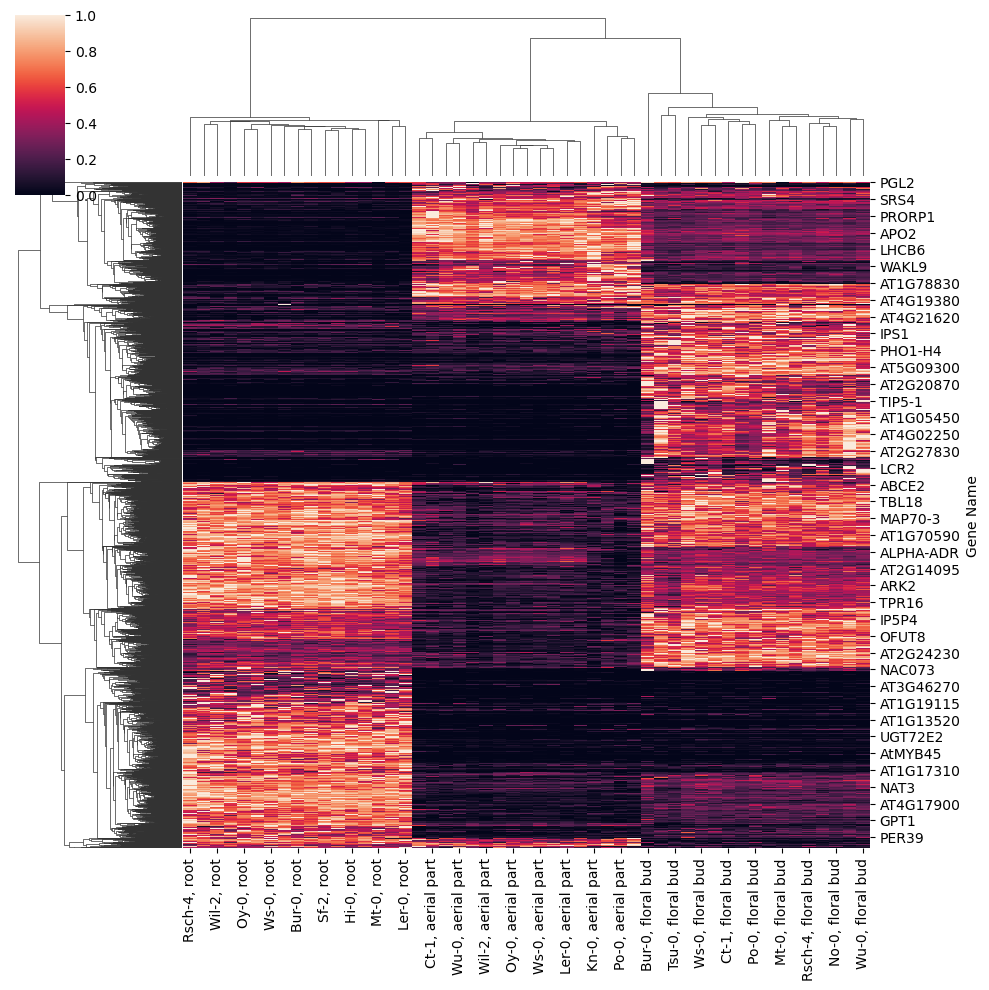

In [48]:
m = rfc.feature_importances_ > 0
ara_17_fi = ara_17.index[m]

sns.clustermap(ara_17.loc[ara_17_fi], standard_scale=0)